In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from catboost import CatBoostClassifier

In [26]:
    '''
This is a remaked csv file which contains numerical values for Balance_Limit_V1 column
    bal = df['Balance_Limit_V1']
    for i in range(24000):
        if(re.match(r'.{1,}[M]',bal[i])):
            bal[i] = float("".join(re.findall(r'[0-9]*[.]{0,1}[0-9]+',bal[i])))*1000000
        elif(re.match(r'.{1,}[K]',bal[i])):
            bal[i] = float("".join(re.findall(r'[0-9]*[.]{0,1}[0-9]+',bal[i])))*1000


#This is a remaked csv file which contains numerical values for AGE column

    df['AgeBin'] = 0
    for i in range(24000):
        if(df['AGE'][i]=='Less than 30'):
            df['AgeBin'][i] = 1
        elif(df['AGE'][i]=='31-45'):
            df['AgeBin'][i] = 2
        elif(df['AGE'][i]=='46-65'):
            df['AgeBin'][i] = 3
        elif(df['AGE'][i]=='More than 65'):
            df['AgeBin'][i] = 4
    '''


'\nThis is a remaked csv file which contains numerical values for Balance_Limit_V1 column\nbal = df[\'Balance_Limit_V1\']\nfor i in range(24000):\n    if(re.match(r\'.{1,}[M]\',bal[i])):\n        bal[i] = float("".join(re.findall(r\'[0-9]*[.]{0,1}[0-9]+\',bal[i])))*1000000\n    elif(re.match(r\'.{1,}[K]\',bal[i])):\n        bal[i] = float("".join(re.findall(r\'[0-9]*[.]{0,1}[0-9]+\',bal[i])))*1000\n\n\n#This is a remaked csv file which contains numerical values for AGE column\n\ndf[\'AgeBin\'] = 0\nfor i in range(24000):\n    if(df[\'AGE\'][i]==\'Less than 30\'):\n        df[\'AgeBin\'][i] = 1\n    elif(df[\'AGE\'][i]==\'31-45\'):\n        df[\'AgeBin\'][i] = 2\n    elif(df[\'AGE\'][i]==\'46-65\'):\n        df[\'AgeBin\'][i] = 3\n    elif(df[\'AGE\'][i]==\'More than 65\'):\n        df[\'AgeBin\'][i] = 4\n'

In [27]:
df = pd.read_csv('credit_card_default_train_remake.csv')

Y = df['NEXT_MONTH_DEFAULT']
X = df.drop('NEXT_MONTH_DEFAULT',axis=1)

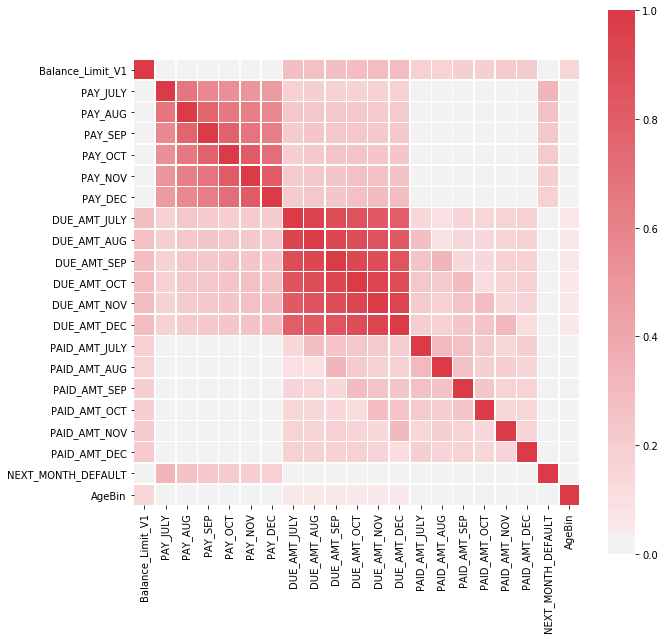

In [31]:
#////////////////////////// Plotting Graphs ////////////////////////////////////
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,square=True, linewidths=.5)
#///////////////////////////////////////////////////////////////////////////////

In [28]:
X.dtypes

Balance_Limit_V1    float64
Gender               object
EDUCATION_STATUS     object
MARITAL_STATUS       object
AGE                  object
PAY_JULY              int64
PAY_AUG               int64
PAY_SEP               int64
PAY_OCT               int64
PAY_NOV               int64
PAY_DEC               int64
DUE_AMT_JULY          int64
DUE_AMT_AUG           int64
DUE_AMT_SEP           int64
DUE_AMT_OCT           int64
DUE_AMT_NOV           int64
DUE_AMT_DEC           int64
PAID_AMT_JULY         int64
PAID_AMT_AUG          int64
PAID_AMT_SEP          int64
PAID_AMT_OCT          int64
PAID_AMT_NOV          int64
PAID_AMT_DEC          int64
AgeBin                int64
dtype: object

In [29]:
categorical_features_indices = np.where(X.dtypes == np.object)[0]

In [30]:
clf = CatBoostClassifier()
clf.fit(X, Y, cat_features=categorical_features_indices)
clf.score(X,Y)

Learning rate set to 0.041184
0:	learn: 0.6702986	total: 102ms	remaining: 1m 42s
1:	learn: 0.6491544	total: 214ms	remaining: 1m 46s
2:	learn: 0.6303556	total: 314ms	remaining: 1m 44s
3:	learn: 0.6128481	total: 417ms	remaining: 1m 43s
4:	learn: 0.5978900	total: 525ms	remaining: 1m 44s
5:	learn: 0.5830774	total: 633ms	remaining: 1m 44s
6:	learn: 0.5700434	total: 782ms	remaining: 1m 50s
7:	learn: 0.5577335	total: 931ms	remaining: 1m 55s
8:	learn: 0.5470405	total: 1.04s	remaining: 1m 54s
9:	learn: 0.5371120	total: 1.15s	remaining: 1m 53s
10:	learn: 0.5284483	total: 1.26s	remaining: 1m 53s
11:	learn: 0.5203338	total: 1.35s	remaining: 1m 51s
12:	learn: 0.5129371	total: 1.46s	remaining: 1m 50s
13:	learn: 0.5063331	total: 1.53s	remaining: 1m 47s
14:	learn: 0.5002055	total: 1.63s	remaining: 1m 47s
15:	learn: 0.4943793	total: 1.73s	remaining: 1m 46s
16:	learn: 0.4891188	total: 1.84s	remaining: 1m 46s
17:	learn: 0.4842653	total: 1.99s	remaining: 1m 48s
18:	learn: 0.4801194	total: 2.09s	remaining:

159:	learn: 0.4226112	total: 15.3s	remaining: 1m 20s
160:	learn: 0.4225392	total: 15.4s	remaining: 1m 20s
161:	learn: 0.4225370	total: 15.5s	remaining: 1m 20s
162:	learn: 0.4224688	total: 15.6s	remaining: 1m 20s
163:	learn: 0.4223277	total: 15.7s	remaining: 1m 20s
164:	learn: 0.4222892	total: 15.8s	remaining: 1m 19s
165:	learn: 0.4222674	total: 15.9s	remaining: 1m 19s
166:	learn: 0.4222445	total: 15.9s	remaining: 1m 19s
167:	learn: 0.4221735	total: 16s	remaining: 1m 19s
168:	learn: 0.4221545	total: 16.1s	remaining: 1m 19s
169:	learn: 0.4220836	total: 16.2s	remaining: 1m 19s
170:	learn: 0.4220620	total: 16.3s	remaining: 1m 18s
171:	learn: 0.4220507	total: 16.3s	remaining: 1m 18s
172:	learn: 0.4219513	total: 16.4s	remaining: 1m 18s
173:	learn: 0.4219241	total: 16.5s	remaining: 1m 18s
174:	learn: 0.4218980	total: 16.7s	remaining: 1m 18s
175:	learn: 0.4218649	total: 16.8s	remaining: 1m 18s
176:	learn: 0.4218059	total: 16.9s	remaining: 1m 18s
177:	learn: 0.4217846	total: 16.9s	remaining: 1m

317:	learn: 0.4168204	total: 29.4s	remaining: 1m 2s
318:	learn: 0.4167880	total: 29.5s	remaining: 1m 2s
319:	learn: 0.4167494	total: 29.6s	remaining: 1m 2s
320:	learn: 0.4166598	total: 29.7s	remaining: 1m 2s
321:	learn: 0.4166127	total: 29.8s	remaining: 1m 2s
322:	learn: 0.4165969	total: 29.9s	remaining: 1m 2s
323:	learn: 0.4165683	total: 30s	remaining: 1m 2s
324:	learn: 0.4165506	total: 30.1s	remaining: 1m 2s
325:	learn: 0.4164921	total: 30.2s	remaining: 1m 2s
326:	learn: 0.4164467	total: 30.3s	remaining: 1m 2s
327:	learn: 0.4164015	total: 30.4s	remaining: 1m 2s
328:	learn: 0.4163421	total: 30.5s	remaining: 1m 2s
329:	learn: 0.4163228	total: 30.6s	remaining: 1m 2s
330:	learn: 0.4163210	total: 30.7s	remaining: 1m 2s
331:	learn: 0.4162957	total: 30.8s	remaining: 1m 2s
332:	learn: 0.4162390	total: 30.9s	remaining: 1m 1s
333:	learn: 0.4162324	total: 31s	remaining: 1m 1s
334:	learn: 0.4161660	total: 31.2s	remaining: 1m 1s
335:	learn: 0.4161301	total: 31.3s	remaining: 1m 1s
336:	learn: 0.41

479:	learn: 0.4116919	total: 46.4s	remaining: 50.2s
480:	learn: 0.4116857	total: 46.5s	remaining: 50.2s
481:	learn: 0.4116133	total: 46.6s	remaining: 50.1s
482:	learn: 0.4115782	total: 46.7s	remaining: 50s
483:	learn: 0.4115565	total: 46.8s	remaining: 49.9s
484:	learn: 0.4115384	total: 46.9s	remaining: 49.8s
485:	learn: 0.4115138	total: 47s	remaining: 49.8s
486:	learn: 0.4115103	total: 47.1s	remaining: 49.7s
487:	learn: 0.4114514	total: 47.2s	remaining: 49.6s
488:	learn: 0.4114429	total: 47.3s	remaining: 49.5s
489:	learn: 0.4113739	total: 47.4s	remaining: 49.4s
490:	learn: 0.4113527	total: 47.6s	remaining: 49.3s
491:	learn: 0.4113477	total: 47.7s	remaining: 49.2s
492:	learn: 0.4112749	total: 47.8s	remaining: 49.1s
493:	learn: 0.4112218	total: 47.9s	remaining: 49s
494:	learn: 0.4112180	total: 48s	remaining: 48.9s
495:	learn: 0.4112111	total: 48.1s	remaining: 48.8s
496:	learn: 0.4111979	total: 48.2s	remaining: 48.8s
497:	learn: 0.4111814	total: 48.3s	remaining: 48.7s
498:	learn: 0.411164

639:	learn: 0.4081914	total: 1m 3s	remaining: 35.5s
640:	learn: 0.4081880	total: 1m 3s	remaining: 35.4s
641:	learn: 0.4081613	total: 1m 3s	remaining: 35.3s
642:	learn: 0.4081425	total: 1m 3s	remaining: 35.2s
643:	learn: 0.4081044	total: 1m 3s	remaining: 35.1s
644:	learn: 0.4080901	total: 1m 3s	remaining: 35s
645:	learn: 0.4080753	total: 1m 3s	remaining: 34.9s
646:	learn: 0.4080247	total: 1m 3s	remaining: 34.8s
647:	learn: 0.4080007	total: 1m 3s	remaining: 34.8s
648:	learn: 0.4079461	total: 1m 4s	remaining: 34.7s
649:	learn: 0.4079409	total: 1m 4s	remaining: 34.6s
650:	learn: 0.4079097	total: 1m 4s	remaining: 34.5s
651:	learn: 0.4079080	total: 1m 4s	remaining: 34.4s
652:	learn: 0.4078463	total: 1m 4s	remaining: 34.3s
653:	learn: 0.4078424	total: 1m 4s	remaining: 34.2s
654:	learn: 0.4078129	total: 1m 4s	remaining: 34.1s
655:	learn: 0.4078055	total: 1m 4s	remaining: 34s
656:	learn: 0.4078013	total: 1m 4s	remaining: 33.9s
657:	learn: 0.4077952	total: 1m 5s	remaining: 33.8s
658:	learn: 0.40

796:	learn: 0.4049440	total: 1m 19s	remaining: 20.3s
797:	learn: 0.4049364	total: 1m 19s	remaining: 20.2s
798:	learn: 0.4049300	total: 1m 19s	remaining: 20.1s
799:	learn: 0.4049047	total: 1m 20s	remaining: 20s
800:	learn: 0.4049025	total: 1m 20s	remaining: 19.9s
801:	learn: 0.4049004	total: 1m 20s	remaining: 19.8s
802:	learn: 0.4048983	total: 1m 20s	remaining: 19.7s
803:	learn: 0.4048846	total: 1m 20s	remaining: 19.6s
804:	learn: 0.4048837	total: 1m 20s	remaining: 19.5s
805:	learn: 0.4048788	total: 1m 20s	remaining: 19.4s
806:	learn: 0.4048725	total: 1m 20s	remaining: 19.3s
807:	learn: 0.4048681	total: 1m 20s	remaining: 19.2s
808:	learn: 0.4048304	total: 1m 20s	remaining: 19.1s
809:	learn: 0.4048060	total: 1m 21s	remaining: 19s
810:	learn: 0.4047918	total: 1m 21s	remaining: 18.9s
811:	learn: 0.4047873	total: 1m 21s	remaining: 18.8s
812:	learn: 0.4047216	total: 1m 21s	remaining: 18.7s
813:	learn: 0.4047195	total: 1m 21s	remaining: 18.6s
814:	learn: 0.4047129	total: 1m 21s	remaining: 18.

952:	learn: 0.4027113	total: 1m 36s	remaining: 4.75s
953:	learn: 0.4026905	total: 1m 36s	remaining: 4.65s
954:	learn: 0.4026878	total: 1m 36s	remaining: 4.55s
955:	learn: 0.4026861	total: 1m 36s	remaining: 4.45s
956:	learn: 0.4026837	total: 1m 36s	remaining: 4.35s
957:	learn: 0.4026775	total: 1m 36s	remaining: 4.25s
958:	learn: 0.4026450	total: 1m 37s	remaining: 4.15s
959:	learn: 0.4026423	total: 1m 37s	remaining: 4.05s
960:	learn: 0.4026331	total: 1m 37s	remaining: 3.95s
961:	learn: 0.4026111	total: 1m 37s	remaining: 3.85s
962:	learn: 0.4025655	total: 1m 37s	remaining: 3.75s
963:	learn: 0.4025444	total: 1m 37s	remaining: 3.65s
964:	learn: 0.4025407	total: 1m 37s	remaining: 3.55s
965:	learn: 0.4025392	total: 1m 38s	remaining: 3.45s
966:	learn: 0.4025380	total: 1m 38s	remaining: 3.35s
967:	learn: 0.4025309	total: 1m 38s	remaining: 3.25s
968:	learn: 0.4025294	total: 1m 38s	remaining: 3.15s
969:	learn: 0.4025254	total: 1m 38s	remaining: 3.05s
970:	learn: 0.4024773	total: 1m 38s	remaining:

0.8293333333333334

In [ ]:
#Accuracy : 0.8293333333333334